## Analysis on churn data and information on specific months for a gym chain that wants to develop customer retention strategy. 

**Task and Goal:**

Here, we are going to scrutinize and process the given dataset. The final goal is to come up with favorable information and strategy that will help the Gym to cut churn and retain its customers. So, initially, we aim at finding the internal connection between different columns or categories of the given dataset.

We will consider the following steps in our whole process and analysis:


-  <a href='#the_destination1'>General Information</a>
-  <a href='#the_destination2'>Exploratory Data Analysis</a>
-  <a href='#the_destination3'>Building model for predicting user churn:</a>
-  <a href='#the_destination4'>Creating user clusters and analysis</a>
-  <a href='#the_destination5'>Recommendation and Conclusion</a>

<a id='the_destination1'></a>
###  Opening the data file, extracting the general information and preparing for analysis. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
try:
    gym_data = pd.read_csv("datasets/gym_churn_us.csv")
except:
    gym_data = pd.read_csv("/datasets/gym_churn_us.csv")

In [3]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
display(gym_data)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [5]:
# To check missing values
gym_data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# To check duplicates (Though it is not needed here)

display(gym_data[gym_data[gym_data.columns.tolist()].duplicated() == True])

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


In [7]:
# Though there are a lot of binary/boolean type columns, in the given dataset type of those columns are 'int' type Since
# it's convenient to use some basic operation if needed. But we can change 'int64' type columns into 'int16' type.

# To convert 'int64' type columns into 'int16' type
for col in gym_data.columns:
    if gym_data[col].dtypes == 'int64':  # x 'float64'
        gym_data[col] = gym_data[col].astype('int16') 

In [8]:
# changing the column name into small letters
gym_data.columns = gym_data.columns.str.lower()


<a id='the_destination2'></a>
### Exploratory data analysis (EDA)

**Looking at the dataset and studying the mean values and standard deviation:**


In [9]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Looking at the mean feature values in two groups: for those who left (churn) and for those who stayed:**

In [10]:
churn_group_data = gym_data.groupby('churn').mean()
churn_group_data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



**Plotting bar histograms and feature distributions for those who left (churn) and those who stayed.**

In [11]:
churned_gym_data = gym_data.query(' churn == 1 ')
retained_gym_data = gym_data.query(' churn == 0 ')

display(churned_gym_data.head())
display(retained_gym_data.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [12]:
#list1 = churned_gym_data.columns.to_list()
columns_list = ['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

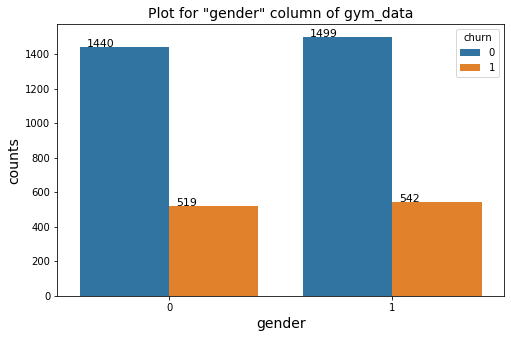

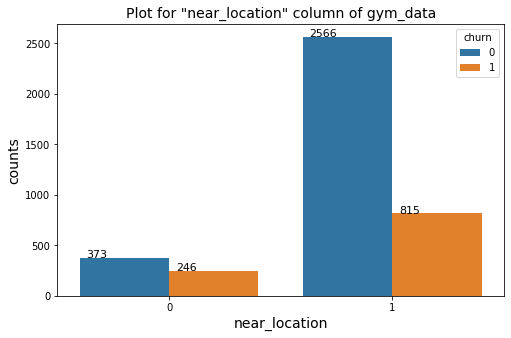

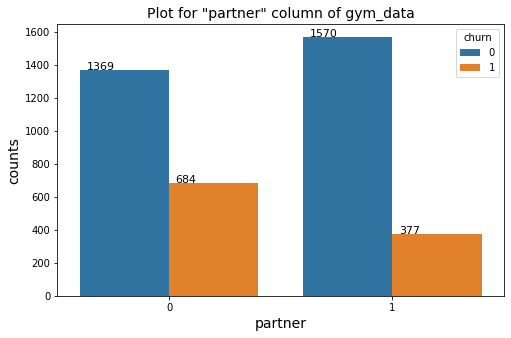

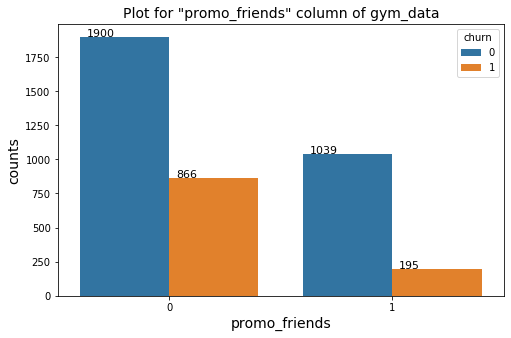

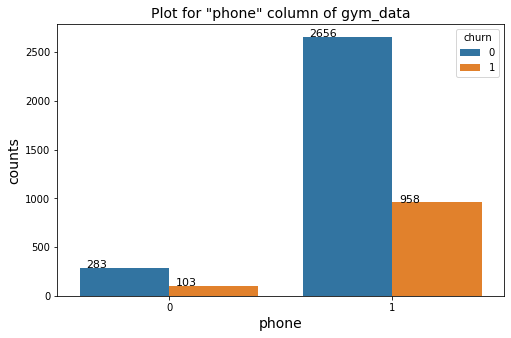

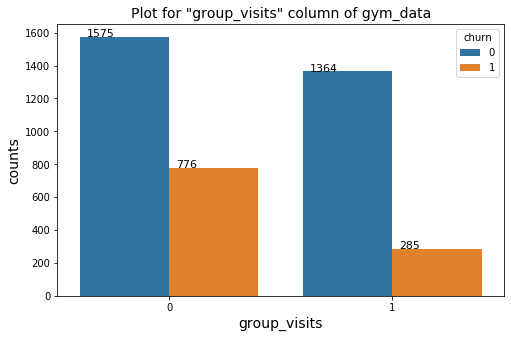

In [13]:
#visualization for different columns in columns_list for gym_data
for j in (columns_list):
    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize=fig_dims)

    plt.title('Plot for "' + j + '" column of gym_data', fontsize=14)
    sns.countplot(x= j,hue='churn', data= gym_data)

    plt.xlabel(j, fontsize=14)
    plt.ylabel('counts', fontsize=14);

    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
    plt.show()

In [14]:
columns_list2 = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 
        'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

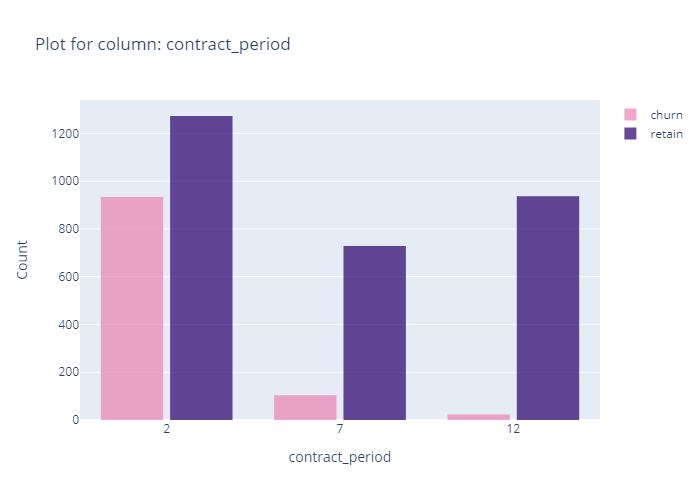

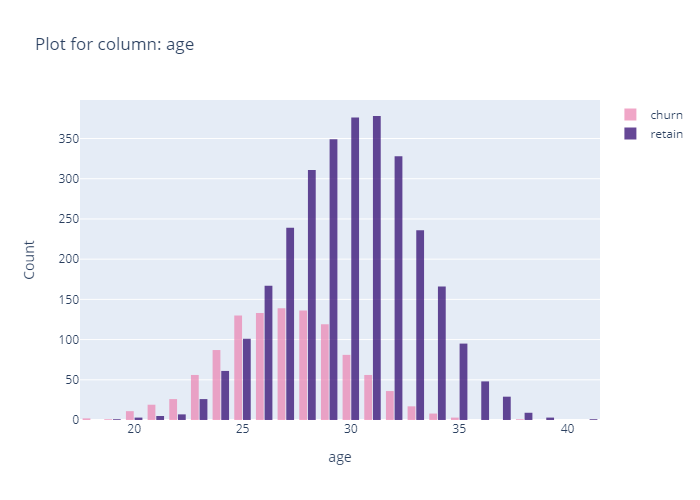

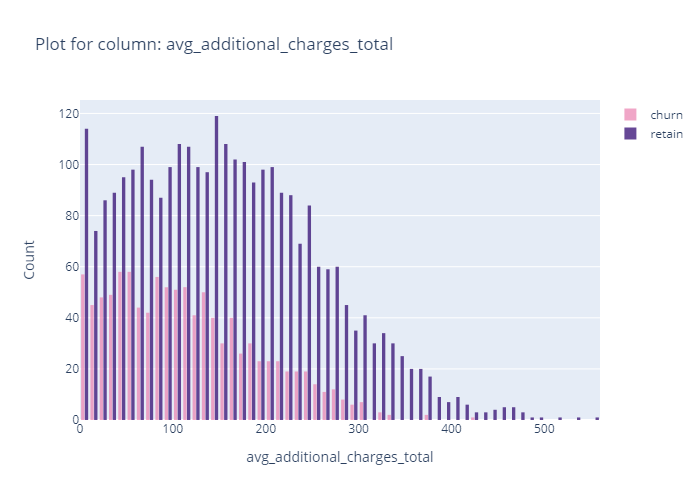

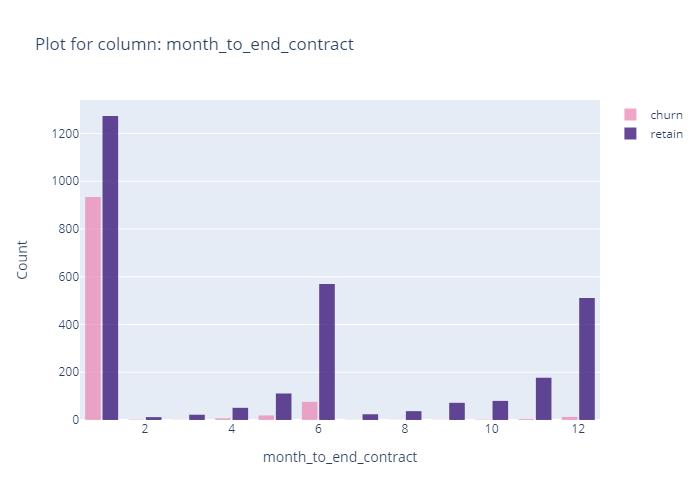

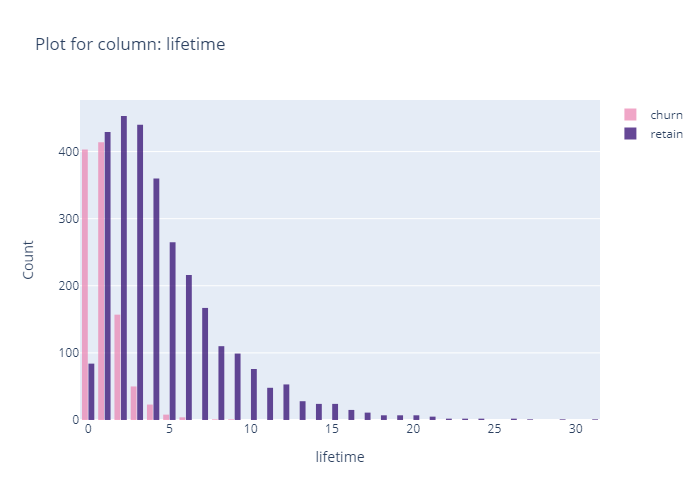

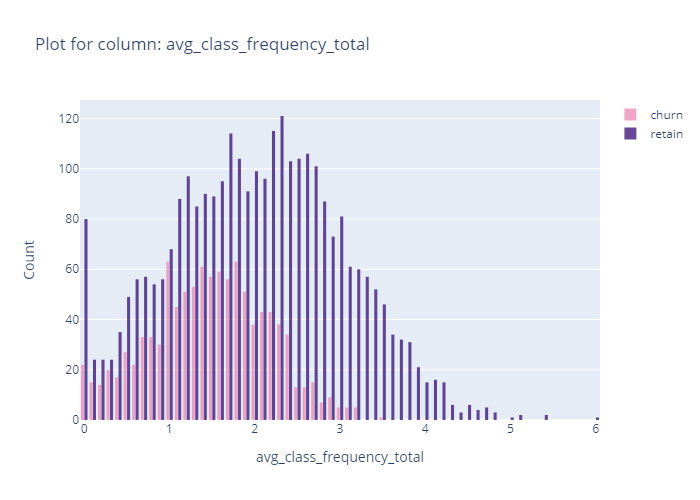

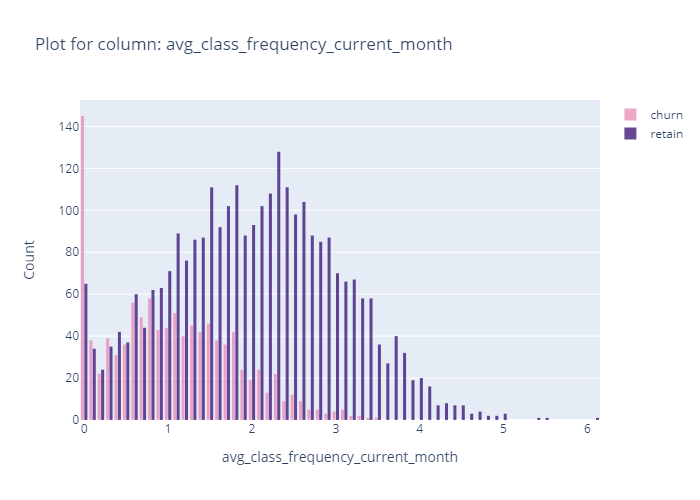

In [15]:
#visualization for different columns in columns_list2 for churned_gym_data & retained_gym_data

for j in columns_list2:

    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=churned_gym_data[j],
        #histnorm='density',
        name='churn', # name used in legend and hover labels
        marker_color='#EB89B5',
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=retained_gym_data[j],
        #histnorm='density',
        name='retain',
        marker_color='#330C73',
        opacity=0.75
    ))

    fig.update_layout(
        title_text='Plot for column: ' + j , # title of plot
        xaxis_title_text= j , # xaxis label
        yaxis_title_text='Count', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinates
    )

    fig.show(renderer="png")



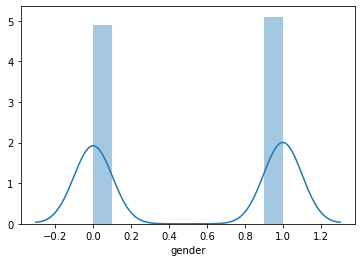

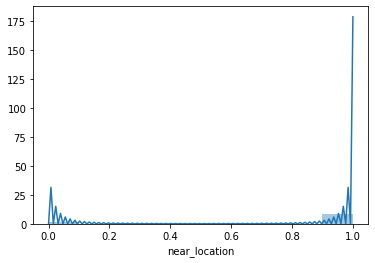

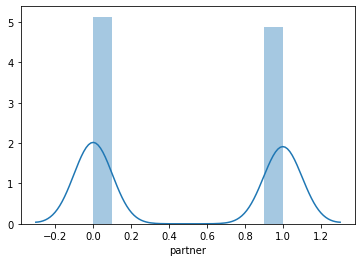

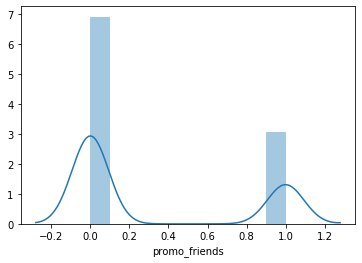

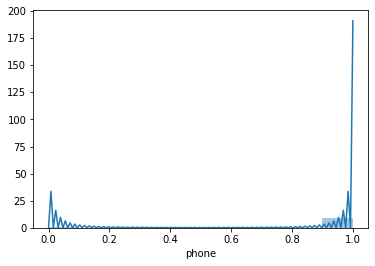

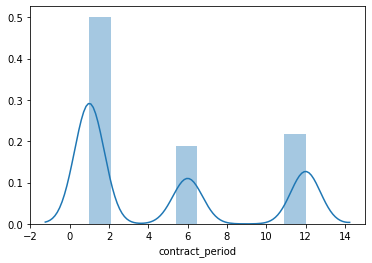

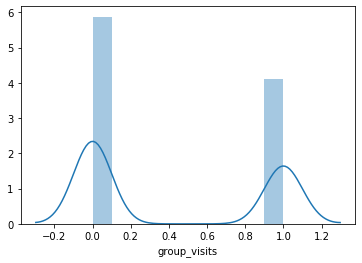

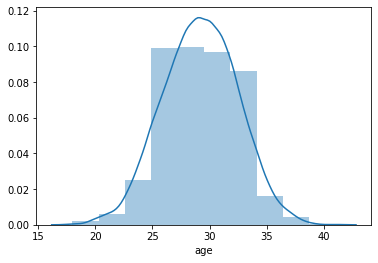

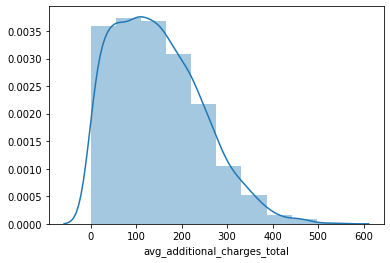

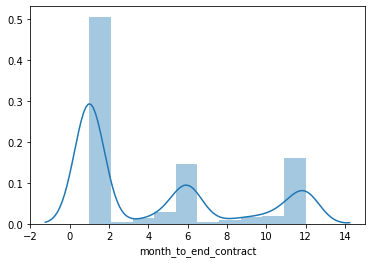

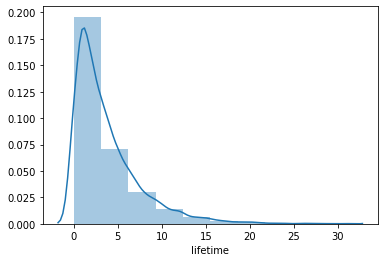

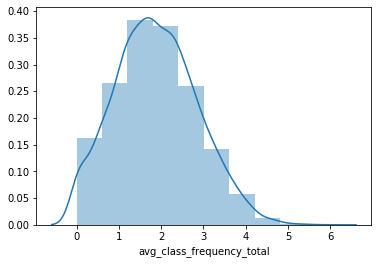

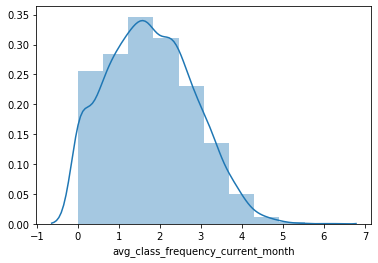

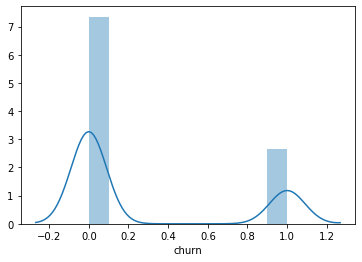

In [16]:
for feature in gym_data.columns:
  sns.distplot(gym_data[feature], bins = 10)
  plt.show() 

**Building a correlation matrix and representation**

In [17]:
corr_data = gym_data.corr()
display(corr_data)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


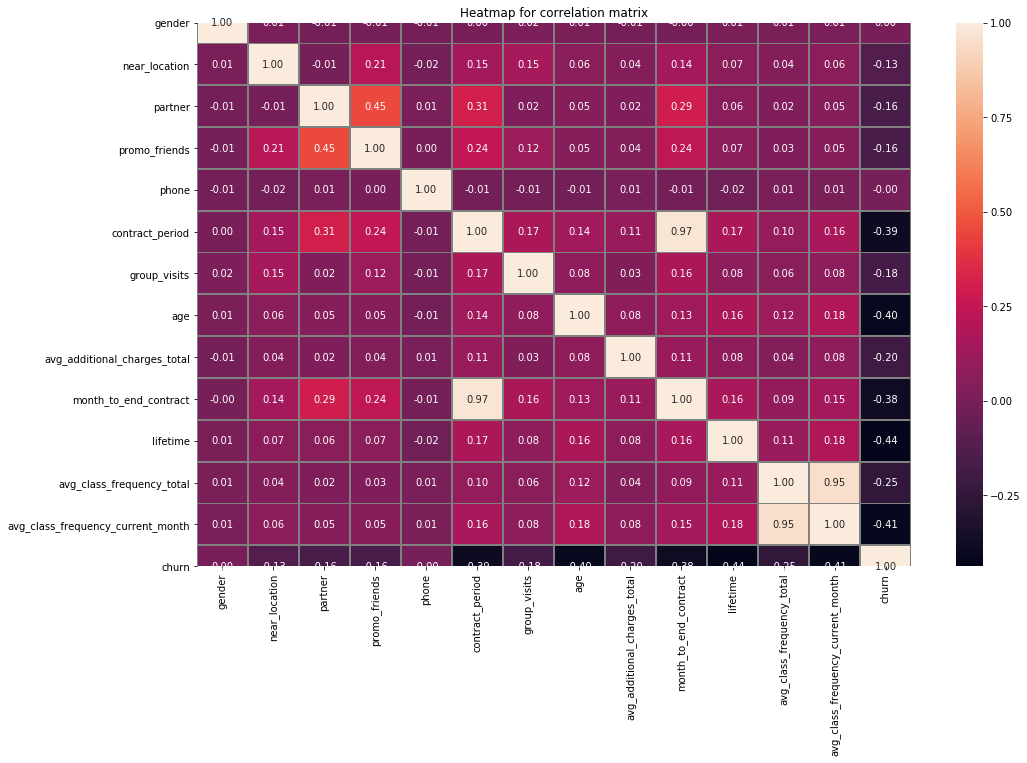

In [18]:
plt.figure(figsize=(16, 10))
plt.title('Heatmap for correlation matrix')
sns.heatmap(
    corr_data,
    annot=True,
    fmt='.2f',
    linewidths=.8,
    linecolor='gray',
)

plt.show()


<a id='the_destination3'></a>
### Building model to predict user churn

**Build a binary classification model for customers where the target feature is the user's leaving next month.**

In [19]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [20]:
# save the DataFrame with transformed features

#gym_data = pd.get_dummies(gym_data)

# divide the data into features (the X matrix) and a target variable (y)
X = gym_data.drop('churn', axis=1)
y = gym_data['churn'] 

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # write your code here

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() # write your code here
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

# declare the list of models
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# # the function that calculates MAPE
# def mape(y_true, y_pred):
#     y_error = y_true - y_pred # calculate the error vector
#     y_error_abs = [abs(i) for i in y_error]# calculate the vector of errors' absolute values
#     perc_error_abs = (y_error_abs / y_true) # calculate the relative error vector
#     mape = (perc_error_abs.sum() / len(y_true) ) #calculate MAPE
#     return mape

# the function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    #print('Model: ', model)
    print()
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print()
# write a loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.79




<a id='the_destination4'></a>
### Creating user clusters

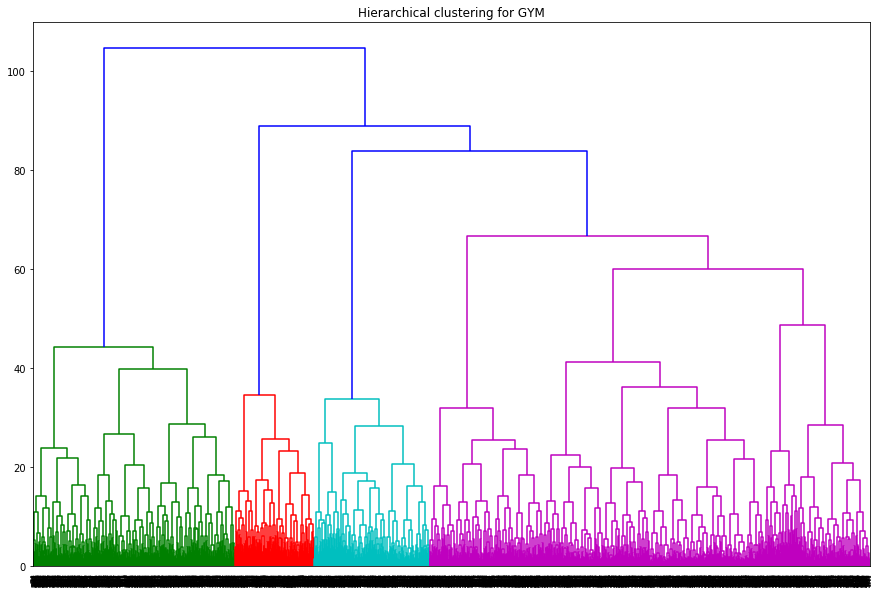

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [21]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Use of the linkage() function 
linked = linkage(x_sc, method='ward')

# Plotting dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state =0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

# calculating silhouette score
#sil_score = silhouette_score(x_sc, labels)

# store cluster labels in the field of our dataset
gym_data['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
clustered_data = gym_data.groupby('cluster_km').mean()
display(clustered_data)

**Plotting distributions of features for the clusters**

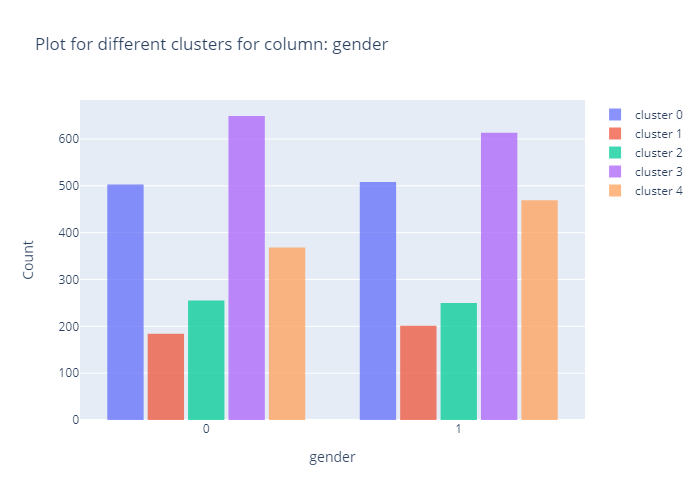

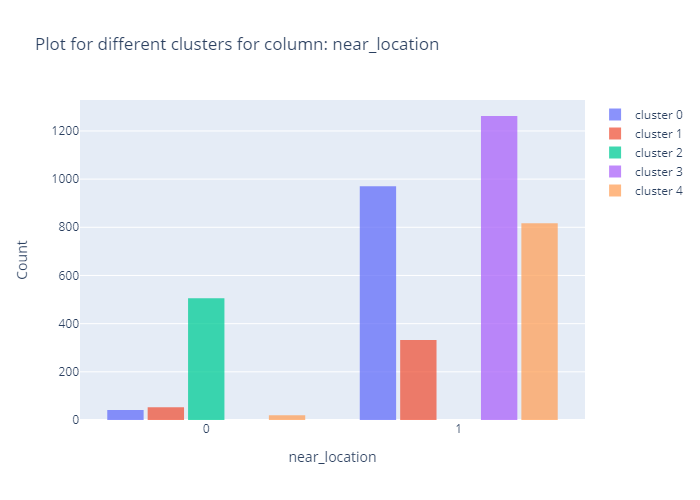

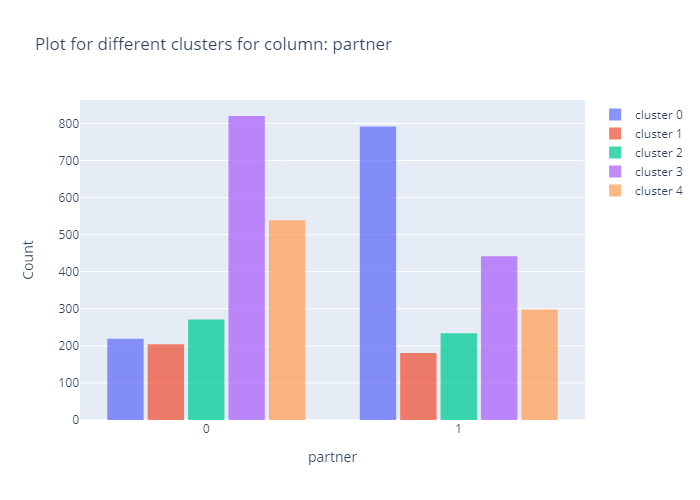

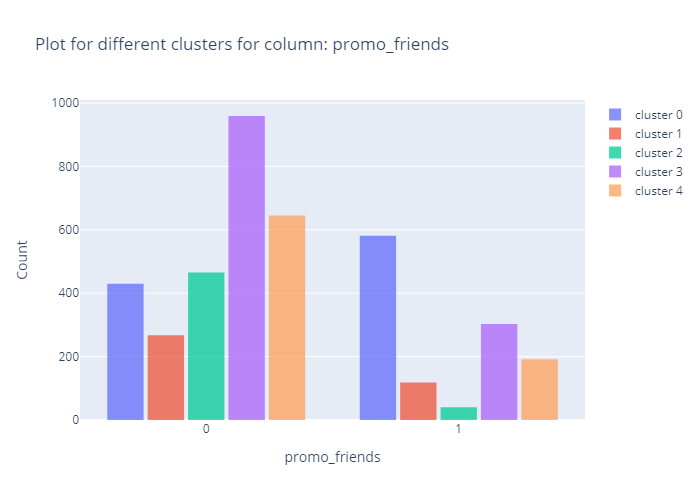

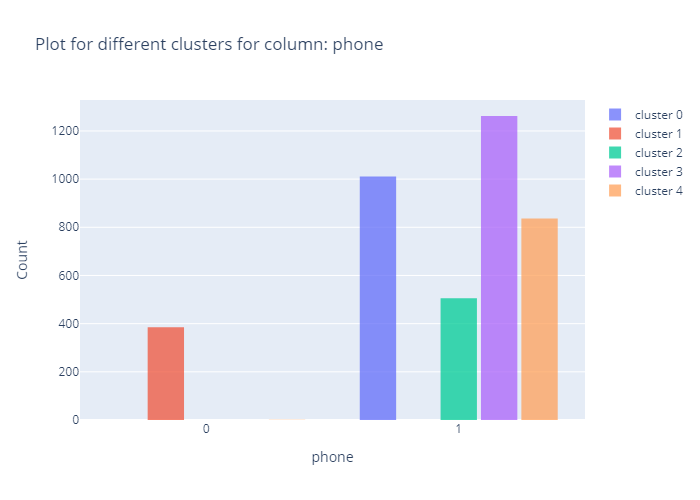

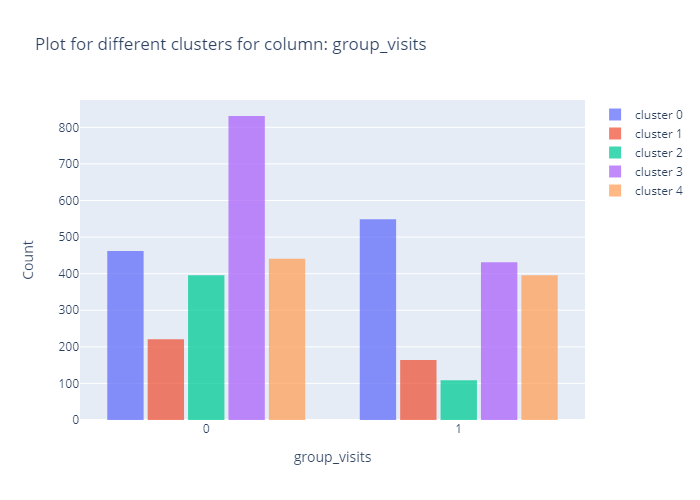

In [22]:
# Plotting distributions of features for the clusters. 

for j in columns_list:
    
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 0 ')[j],
        #histnorm='density',
        name='cluster 0', # name used in legend and hover labels
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 1 ')[j],
        #histnorm='density',
        name='cluster 1',
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 2 ')[j],
        #histnorm='density',
        name='cluster 2',
        opacity=0.75
    ))

    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 3 ')[j],
        #histnorm='density',
        name='cluster 3',
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 4 ')[j],
        #histnorm='density',
        name='cluster 4',
        opacity=0.75
    ))
    

    fig.update_layout(
        #barmode='overlay', # group
        title_text='Plot for different clusters for column: ' +  j , # title of plot
        xaxis_title_text= j , # xaxis label
        yaxis_title_text='Count', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinates
    )

    fig.show(renderer="png")


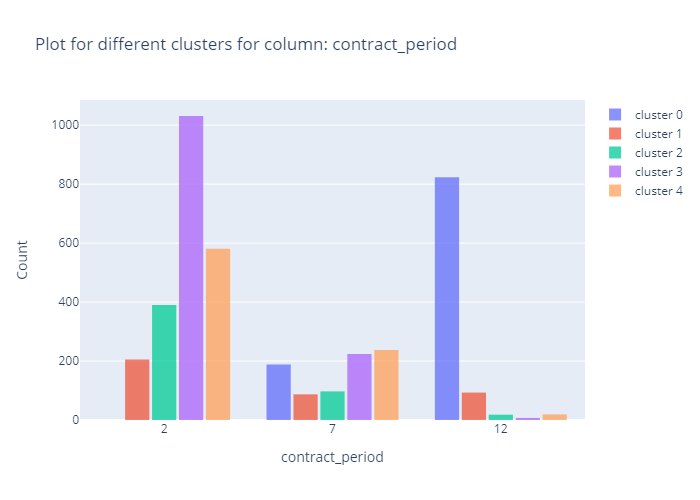

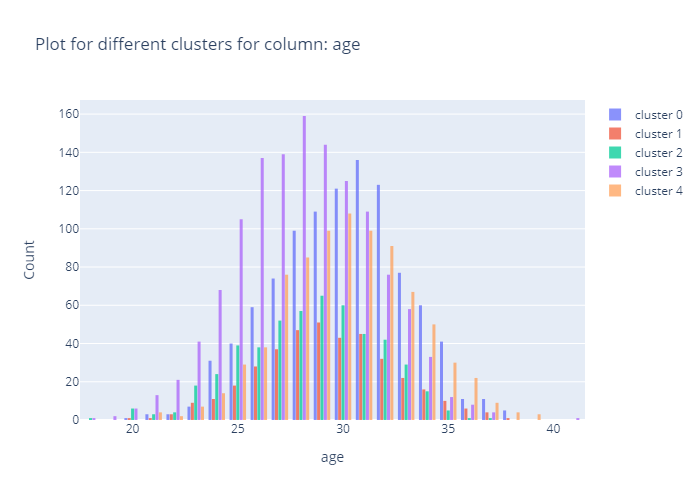

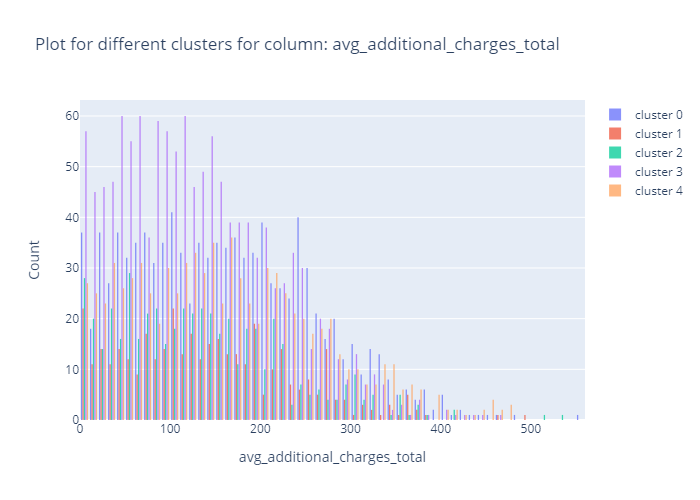

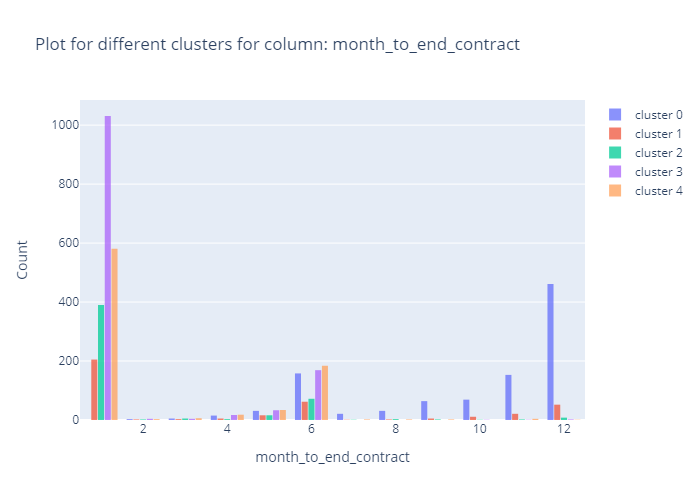

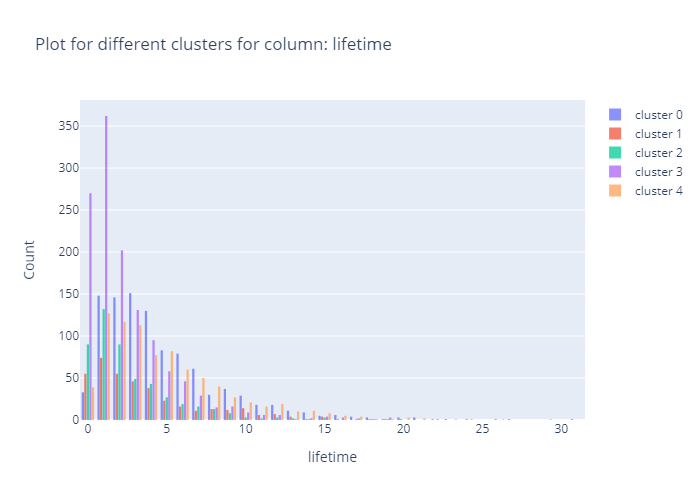

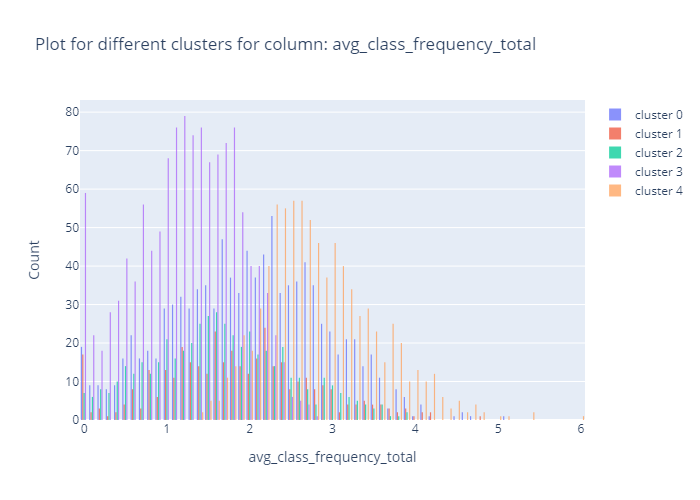

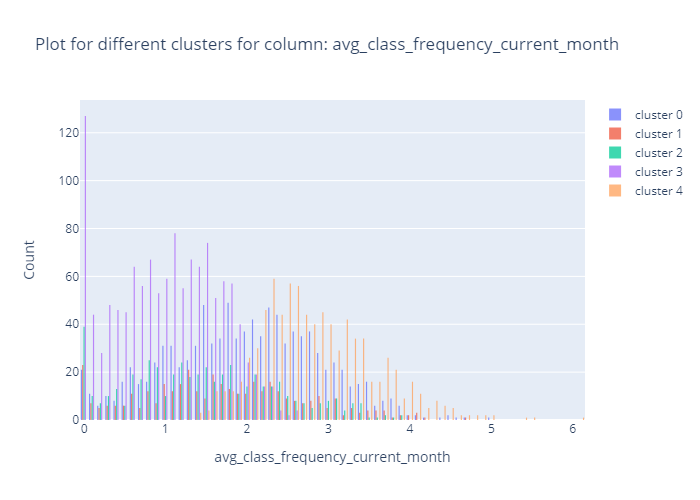

In [23]:
# Plotting distributions of features for the clusters. 

for j in columns_list2:
    
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 0 ')[j],
        #histnorm='density',
        name='cluster 0', # name used in legend and hover labels
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 1 ')[j],
        #histnorm='density',
        name='cluster 1',
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 2 ')[j],
        #histnorm='density',
        name='cluster 2',
        opacity=0.75
    ))

    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 3 ')[j],
        #histnorm='density',
        name='cluster 3',
        opacity=0.75
    ))
    fig.add_trace(go.Histogram(
        x=gym_data.query('cluster_km == 4 ')[j],
        #histnorm='density',
        name='cluster 4',
        opacity=0.75
    ))
    

    fig.update_layout(
        #barmode='overlay', # group
        title_text='Plot for different clusters for column: ' +  j , # title of plot
        xaxis_title_text= j , # xaxis label
        yaxis_title_text='Count', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinates
    )

    fig.show(renderer="png")


**Calculating the churn rate for each cluster, ckecking if they differ in terms of churn rate, finding which clusters are prone to leaving, and which are loyal:**

In [24]:
display(clustered_data)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [25]:
# Make a table to show the churn rate for each cluster
churn_rate_table = gym_data.pivot_table(index='cluster_km', values= 'churn', aggfunc= {'cluster_km':'count', 'churn':'sum'})
churn_rate_table.columns= ['churned_numb', 'total_users']
churn_rate_table['churn_rate (in %)'] = (churn_rate_table['churned_numb'] / churn_rate_table['total_users']*100).round(2)
display(churn_rate_table)

,churned_numb,total_users,churn_rate (in %)
cluster_km,,,
0,28,1011,2.77
1,103,385,26.75
2,224,505,44.36
3,649,1262,51.43
4,57,837,6.81


<div class="alert alert-info"> 
<b>Remark:</b> 
It would be nice to state that due to special reasons, neither all the comments nor the report of the analysis were added with this part of the project. Therefore, there is no reason to consider this version as complete though this is the important and core part of the project.  
    
                                      Thank you very much for your scrutiny and time.
   
</div>